In [2]:
### take as input the results of ECF scan on all proteins ('scan-min' mode of Workflow notebook)

In [1]:
%load_ext autoreload
%autoreload 2

In [20]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns

import sys
sys.path.append('/Users/kszczepaniak/Code/phage-pipeline-env/phage-pipeline')
from lib_phage.utils import generate_msa, get_ecf_hits, clean_msa
from Bio import SeqIO

work_dir            = '/Users/kszczepaniak/Data/Phage/phage-pipeline-workdir-dev/'
ecf_aho_80_filepath = '/Users/kszczepaniak/Data/Phage/preliminary-results/table-ecf-aho-80'

sns.set(rc={"figure.figsize":(10, 8)})

In [ ]:
ecfs_results = pickle.load(open(work_dir + 'output/ecf-search/ecfs_results', 'rb'))
repr_seqs = SeqIO.to_dict(SeqIO.parse("/Users/kszczepaniak/Data/Phage/preliminary-results/repr-seqs.fa", "fasta"))

In [22]:
# TEMP - deal with second (Workflow) notebook clearing behaviour

pickle.dump(ecfs_results, open('/Users/kszczepaniak/Data/Phage/backup/ecfs_results', 'wb'))

In [5]:
# load from TEMP storage
ecfs_results = pickle.load(open('/Users/kszczepaniak/Data/Phage/backup/ecfs_results', 'rb'))
repr_seqs = SeqIO.to_dict(SeqIO.parse("/Users/kszczepaniak/Data/Phage/preliminary-results/repr-seqs.fa", "fasta"))

Total proteins in results (not all with detected ECFs): 10764
Mean ECF per prot: 0.85479375696767


[Text(0.5, 0, 'ECF per protein')]

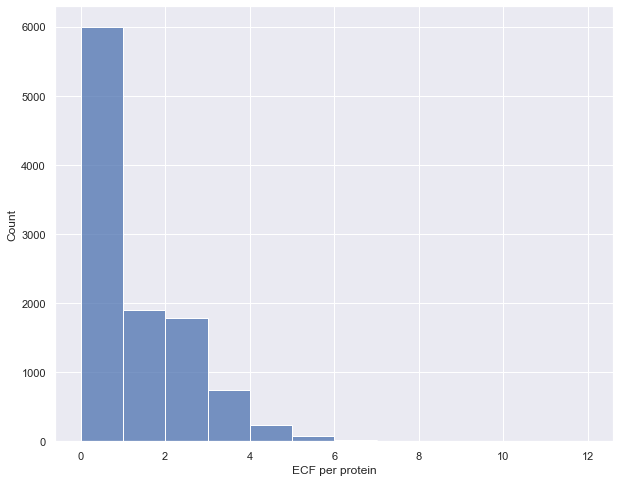

In [6]:
### ECF per protein - distribution and mean
print('Total proteins in results (not all with detected ECFs):', len(ecfs_results))

ecf_per_prot = [ len(n) for i,n in ecfs_results.items() ]
print('Mean ECF per prot:', np.mean(ecf_per_prot))

sns.histplot(ecf_per_prot, binwidth=1).set(xlabel='ECF per protein')

Mean ECF span: 135.26562330181503


[Text(0.5, 0, 'ECF span [AA]')]

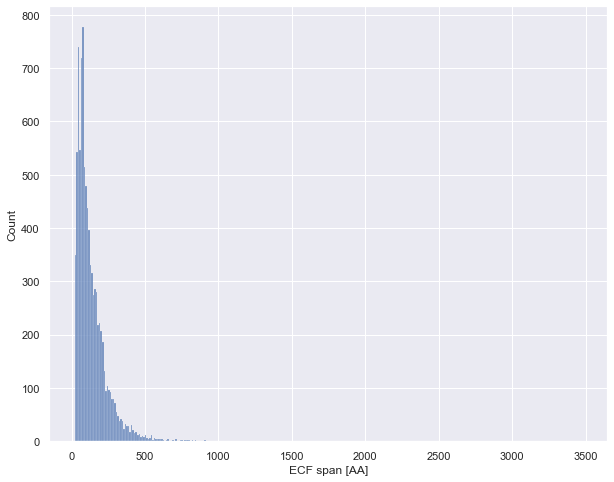

In [7]:
### ECF span: dist and mean

ecf_spans = []

for pid, prot in ecfs_results.items():
    if prot:
        for cid, clust in prot.items():
            ecf_spans.append(clust['ecf_span'])
            
print('Mean ECF span:', np.mean(ecf_spans))
            
sns.histplot(ecf_spans).set(xlabel='ECF span [AA]')

Mean avg hit len to ECF span: 0.8026201500365432


[Text(0.5, 0, 'Average hit len to ECF span')]

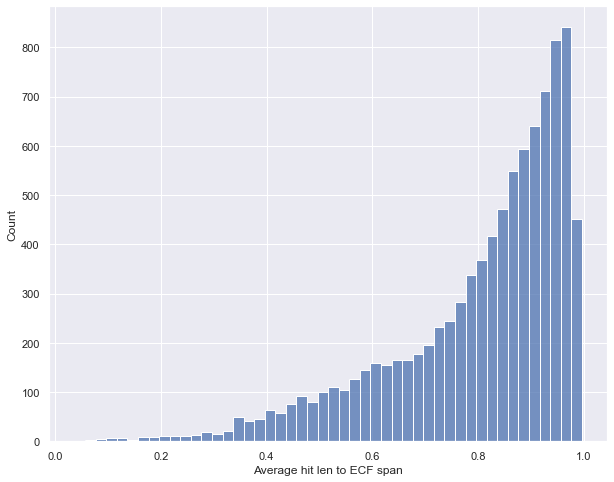

In [8]:
### ECF average hit len to ECF span ratio: dist and mean

ecf_ahl2span = []

for pid, prot in ecfs_results.items():
    if prot:
        for cid, clust in prot.items():
            ecf_ahl2span.append(clust['avg_hit_len_to_ecf_span'])
            
print('Mean avg hit len to ECF span:', np.mean(ecf_ahl2span))
            
sns.histplot(ecf_ahl2span).set(xlabel='Average hit len to ECF span')

Mean number of hits per ECF: 26.199326160199977


[Text(0.5, 0, 'Number of hits per ECF')]

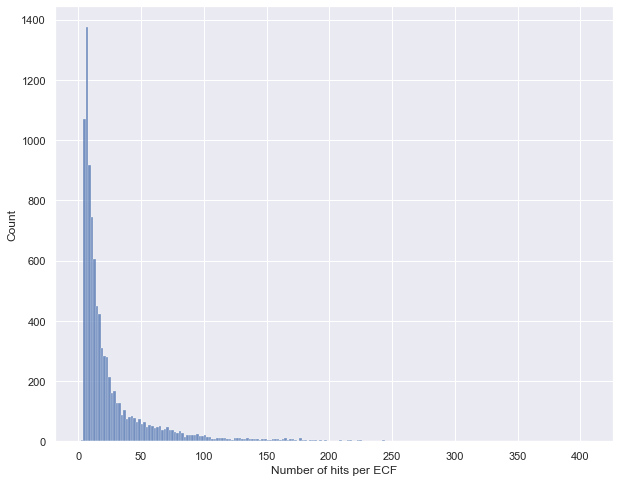

In [9]:
### ECF - number of hits comprising ECF
ecf_hits = []

for pid, prot in ecfs_results.items():
    if prot:
        for cid, clust in prot.items():
            ecf_hits.append(clust['nb_hits'])
            
print('Mean number of hits per ECF:', np.mean(ecf_hits))
            
sns.histplot(ecf_hits).set(xlabel='Number of hits per ECF')

Mean ratio of ECF span to qlength: 0.337330188851663


<AxesSubplot:ylabel='Count'>

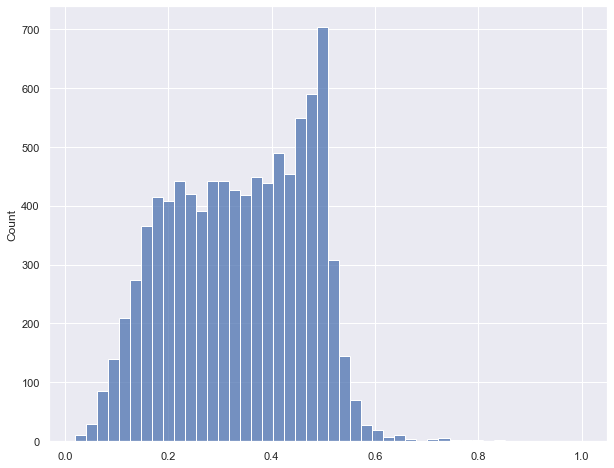

In [10]:
### ECF - span to query len ratios
ecf_span2qlens = []

for pid, prot in ecfs_results.items():
    if prot:
        for cid, clust in prot.items():
            ecf_span2qlens.append(clust['span_to_qlength'])
            
print('Mean ratio of ECF span to qlength:', np.mean(ecf_span2qlens))
            
sns.histplot(ecf_span2qlens)

Mean average overlap of hits in ECF: 0.8483850780773788


[Text(0.5, 0, 'Average hit overlap')]

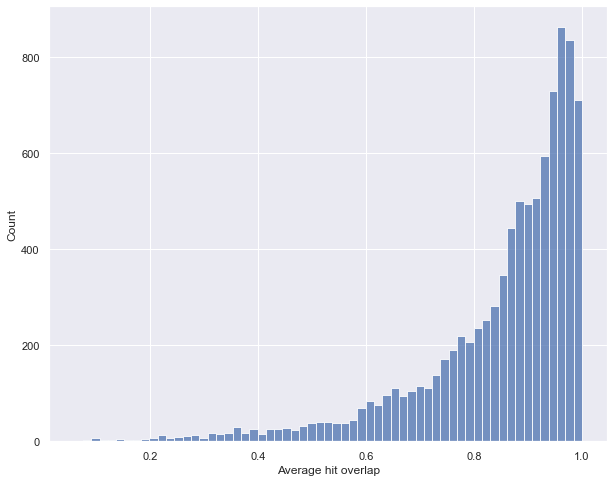

In [11]:
### ECF - average overlap of hits comprising ECF
ecf_overlaps = []

for pid, prot in ecfs_results.items():
    if prot:
        for cid, clust in prot.items():
            ecf_overlaps.append(clust['avg_hits_overlap'])
            
print('Mean average overlap of hits in ECF:', np.mean(ecf_overlaps))
            
sns.histplot(ecf_overlaps).set(xlabel='Average hit overlap')

In [13]:
### convert results to df
ecfs_df = pd.DataFrame(columns=['prot_id', 'ecf_id', 'nb_hits', 'avg_hits_overlap', 'ecf_span', 
                                'avg_hit_len_to_ecf_span', 'span_to_qlength', 'cluster_data'])
for protid, clusters in ecfs_results.items():
    for cid, cdata in clusters.items():
        ecfs_df.loc[len(ecfs_df.index)] = [protid, cid, cdata['nb_hits'], cdata['avg_hits_overlap'],
                                           cdata['ecf_span'], cdata['avg_hit_len_to_ecf_span'],
                                           cdata['span_to_qlength'], cdata['cluster_data']]

ecfs_df

,prot_id,ecf_id,nb_hits,avg_hits_overlap,ecf_span,avg_hit_len_to_ecf_span,span_to_qlength,cluster_data
0,reprseq00051,0,8,0.892866,211,0.883294,0.370175,qname qstart qend qlength ...
1,reprseq00051,1,10,0.972710,187,0.939572,0.328070,qname qstart qend qlength ...
2,reprseq00052,0,53,0.454298,616,0.316497,0.381660,qname qstart qend qlength ...
3,reprseq00052,1,9,0.367253,340,0.310458,0.210657,qname qstart qend qlength ...
4,reprseq00052,2,15,0.473237,250,0.486933,0.154895,qname qstart qend qlength ...
...,...,...,...,...,...,...,...,...
9196,reprseq34460,0,30,0.604902,400,0.615333,0.580552,qname qstart qend qlength ...
9197,reprseq34460,1,22,0.242784,287,0.280646,0.416546,qname qstart qend qlength ...
9198,reprseq34460,2,12,0.610659,187,0.294118,0.271408,qname qstart qend qlength ...
9199,reprseq34460,3,10,0.749775,46,0.763043,0.066763,qname qstart qend qlength ...


In [134]:
### Sample ECFs with various avg hit overlap
### 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0 (10 plots each)
### this was done once to determine avg hit overlap threshold: it was set to 0.8 after manual plot inspection

ranges     = [(0.0, 0.2), (0.2,0.4)] + [ (x, x+0.1) for x in np.arange(0.4, 1.0, 0.1) ]
sample_ids = []

for r in ranges:
    print(r, str(round(r[1],2)).replace('.', ''))
    sample = ecfs_df[(ecfs_df.avg_hits_overlap > r[0]) & (ecfs_df.avg_hits_overlap < r[1])].sample(n=10, random_state=1)
    sample.to_csv('/Users/kszczepaniak/Data/Phage/preliminary-results/plots/overlap_' + str(round(r[1],2)).replace('.', '') + '/ecf_table.csv',
                 columns=['prot_id', 'ecf_id', 'nb_hits', 'avg_hits_overlap', 'ecf_span', 'avg_hit_len_to_ecf_span',
                          'span_to_qlength'])
    display(sample)
    sample_ids.append([ int(i.replace('reprseq', '')) for i in sample['prot_id'].unique() ])
    
for r in sample_ids:
    print(r)

(0.0, 0.2) 02


,prot_id,ecf_id,nb_hits,avg_hits_overlap,ecf_span,avg_hit_len_to_ecf_span,span_to_qlength,cluster_data
1057,reprseq30394,1,102,0.129200,706,0.130478,0.450542,qname qstart qend qlength ...
169,reprseq04160,0,44,0.126033,334,0.151946,0.427657,qname qstart qend qlength ...
717,reprseq20614,0,42,0.103069,3135,0.059474,0.426473,qname qstart qend qlength ...
1007,reprseq29190,0,111,0.156328,380,0.206923,0.426009,qname qstart qend qlength ...
773,reprseq22069,0,74,0.084092,531,0.072199,0.460538,qname qstart qend qlength ...
676,reprseq19092,1,91,0.123909,1273,0.079711,0.444638,qname qstart qend qlength ...
736,reprseq21201,0,146,0.148781,840,0.144292,0.639269,qname qstart qend qlength ...
490,reprseq13630,1,18,0.052129,488,0.076844,0.471498,qname qstart qend qlength ...
502,reprseq14285,0,8,0.181405,174,0.203305,0.245416,qname qstart qend qlength ...
1150,reprseq33464,0,84,0.154421,418,0.167607,0.437696,qname qstart qend qlength ...


(0.2, 0.4) 04


,prot_id,ecf_id,nb_hits,avg_hits_overlap,ecf_span,avg_hit_len_to_ecf_span,span_to_qlength,cluster_data
5168,reprseq17526,1,10,0.376050,217,0.423502,0.206274,qname qstart qend qlength ...
349,reprseq08981,1,77,0.322717,369,0.314293,0.280395,qname qstart qend qlength ...
308,reprseq07950,1,53,0.228888,292,0.181959,0.403315,qname qstart qend qlength ...
766,reprseq21972,1,102,0.360441,336,0.358514,0.281643,qname qstart qend qlength ...
1365,reprseq00780,1,17,0.380741,309,0.417285,0.221030,qname qstart qend qlength ...
6494,reprseq23564,0,10,0.230053,440,0.337955,0.400000,qname qstart qend qlength ...
804,reprseq23066,0,6,0.257462,30,0.327778,0.055147,qname qstart qend qlength ...
19,reprseq00315,2,8,0.203761,279,0.271505,0.202909,qname qstart qend qlength ...
279,reprseq07058,2,7,0.354997,420,0.369388,0.167598,qname qstart qend qlength ...
4544,reprseq15209,1,14,0.316847,371,0.305930,0.296563,qname qstart qend qlength ...


(0.4, 0.5) 05


,prot_id,ecf_id,nb_hits,avg_hits_overlap,ecf_span,avg_hit_len_to_ecf_span,span_to_qlength,cluster_data
677,reprseq19092,2,60,0.427886,520,0.512276,0.181628,qname qstart qend qlength ...
5911,reprseq20488,3,10,0.489955,146,0.458219,0.220877,qname qstart qend qlength ...
28,reprseq00492,2,50,0.413047,445,0.342742,0.319914,qname qstart qend qlength ...
7082,reprseq25960,0,43,0.450257,482,0.474621,0.402337,qname qstart qend qlength ...
4481,reprseq14873,1,8,0.417700,125,0.512000,0.130753,qname qstart qend qlength ...
166,reprseq04088,0,48,0.476163,250,0.468167,0.286697,qname qstart qend qlength ...
1152,reprseq33464,2,28,0.462602,281,0.402008,0.294241,qname qstart qend qlength ...
316,reprseq08081,2,28,0.478336,332,0.377474,0.151529,qname qstart qend qlength ...
1703,reprseq02442,0,15,0.445688,299,0.388852,0.299299,qname qstart qend qlength ...
202,reprseq04898,0,117,0.433633,170,0.478934,0.648855,qname qstart qend qlength ...


(0.5, 0.6) 06


,prot_id,ecf_id,nb_hits,avg_hits_overlap,ecf_span,avg_hit_len_to_ecf_span,span_to_qlength,cluster_data
1029,reprseq29773,0,102,0.566019,198,0.663498,0.338462,qname qstart qend qlength ...
694,reprseq19517,2,10,0.528433,260,0.510769,0.270270,qname qstart qend qlength ...
812,reprseq23506,1,123,0.527673,247,0.486521,0.324147,qname qstart qend qlength ...
9240,reprseq34460,2,13,0.521964,187,0.277252,0.271408,qname qstart qend qlength ...
4229,reprseq13427,0,135,0.553632,176,0.454545,0.633094,qname qstart qend qlength ...
702,reprseq19967,1,37,0.527926,802,0.539361,0.341422,qname qstart qend qlength ...
3920,reprseq11796,0,140,0.522781,181,0.454420,0.494536,qname qstart qend qlength ...
4321,reprseq13836,1,15,0.514200,295,0.478192,0.353293,qname qstart qend qlength ...
6286,reprseq22199,0,12,0.586653,221,0.545626,0.282248,qname qstart qend qlength ...
1082,reprseq30939,1,6,0.564834,307,0.685125,0.298058,qname qstart qend qlength ...


(0.6, 0.7) 07


,prot_id,ecf_id,nb_hits,avg_hits_overlap,ecf_span,avg_hit_len_to_ecf_span,span_to_qlength,cluster_data
5101,reprseq17259,1,15,0.649871,154,0.455411,0.358140,qname qstart qend qlength ...
1821,reprseq03016,1,27,0.678611,82,0.528004,0.181818,qname qstart qend qlength ...
938,reprseq27682,1,33,0.619286,255,0.547118,0.500982,qname qstart qend qlength ...
725,reprseq20814,0,5,0.656534,204,0.675490,0.342282,qname qstart qend qlength ...
9206,reprseq34347,1,13,0.654064,115,0.739799,0.445736,qname qstart qend qlength ...
553,reprseq16025,1,50,0.691178,225,0.459378,0.219085,qname qstart qend qlength ...
8981,reprseq33691,1,23,0.609572,72,0.567029,0.144578,qname qstart qend qlength ...
7071,reprseq25890,1,25,0.627357,81,0.538272,0.199017,qname qstart qend qlength ...
666,reprseq18915,0,10,0.664397,205,0.651220,0.506173,qname qstart qend qlength ...
6040,reprseq21060,1,42,0.608027,99,0.577922,0.215217,qname qstart qend qlength ...


(0.7, 0.7999999999999999) 08


,prot_id,ecf_id,nb_hits,avg_hits_overlap,ecf_span,avg_hit_len_to_ecf_span,span_to_qlength,cluster_data
8861,reprseq33371,2,10,0.711503,178,0.781461,0.282540,qname qstart qend qlength ...
3547,reprseq10037,0,72,0.787122,45,0.663889,0.221675,qname qstart qend qlength ...
9107,reprseq34010,1,141,0.793773,53,0.502476,0.196296,qname qstart qend qlength ...
5952,reprseq20672,1,60,0.707910,79,0.489030,0.173626,qname qstart qend qlength ...
6491,reprseq23548,0,11,0.739712,89,0.715015,0.502825,qname qstart qend qlength ...
1704,reprseq02442,1,18,0.733190,252,0.626102,0.252252,qname qstart qend qlength ...
7134,reprseq26174,0,72,0.756934,51,0.574346,0.262887,qname qstart qend qlength ...
693,reprseq19517,1,19,0.702883,237,0.642461,0.246362,qname qstart qend qlength ...
3571,reprseq10175,1,109,0.742765,65,0.577982,0.451389,qname qstart qend qlength ...
387,reprseq10690,0,8,0.753062,205,0.552439,0.450549,qname qstart qend qlength ...


(0.7999999999999999, 0.8999999999999999) 09


,prot_id,ecf_id,nb_hits,avg_hits_overlap,ecf_span,avg_hit_len_to_ecf_span,span_to_qlength,cluster_data
5741,reprseq19872,1,16,0.803474,46,0.703804,0.225490,qname qstart qend qlength ...
6044,reprseq21079,0,9,0.800723,32,0.829861,0.290909,qname qstart qend qlength ...
7462,reprseq27643,0,9,0.843979,154,0.781385,0.523810,qname qstart qend qlength ...
1903,reprseq03250,1,20,0.880313,78,0.434615,0.226744,qname qstart qend qlength ...
3955,reprseq12106,0,64,0.881341,249,0.876318,0.487280,qname qstart qend qlength ...
947,reprseq27862,1,12,0.896826,98,0.814626,0.294294,qname qstart qend qlength ...
8563,reprseq32094,0,6,0.826640,91,0.829670,0.204494,qname qstart qend qlength ...
768,reprseq21972,3,8,0.811947,114,0.671053,0.095557,qname qstart qend qlength ...
6860,reprseq24931,0,14,0.897712,237,0.748945,0.350592,qname qstart qend qlength ...
1344,reprseq00674,1,9,0.835882,50,0.853333,0.299401,qname qstart qend qlength ...


(0.8999999999999999, 0.9999999999999999) 10


,prot_id,ecf_id,nb_hits,avg_hits_overlap,ecf_span,avg_hit_len_to_ecf_span,span_to_qlength,cluster_data
4912,reprseq16653,0,15,0.962180,141,0.922931,0.453376,qname qstart qend qlength ...
3108,reprseq07914,1,12,0.975509,142,0.971831,0.478114,qname qstart qend qlength ...
3335,reprseq08884,0,17,0.936847,503,0.835224,0.483654,qname qstart qend qlength ...
3820,reprseq11275,0,5,0.925300,117,0.929915,0.433333,qname qstart qend qlength ...
5264,reprseq17839,0,8,0.960089,265,0.937264,0.455326,qname qstart qend qlength ...
9181,reprseq34223,0,18,0.986315,296,0.983671,0.398922,qname qstart qend qlength ...
7818,reprseq29059,0,10,0.932337,28,0.885714,0.105660,qname qstart qend qlength ...
5130,reprseq17363,4,5,0.924227,63,0.885714,0.170270,qname qstart qend qlength ...
8626,reprseq32636,0,12,0.995288,245,0.989796,0.378671,qname qstart qend qlength ...
6908,reprseq25119,3,5,0.914444,53,0.905660,0.514563,qname qstart qend qlength ...


[30394, 4160, 20614, 29190, 22069, 19092, 21201, 13630, 14285, 33464]
[17526, 8981, 7950, 21972, 780, 23564, 23066, 315, 7058, 15209]
[19092, 20488, 492, 25960, 14873, 4088, 33464, 8081, 2442, 4898]
[29773, 19517, 23506, 34460, 13427, 19967, 11796, 13836, 22199, 30939]
[17259, 3016, 27682, 20814, 34347, 16025, 33691, 25890, 18915, 21060]
[33371, 10037, 34010, 20672, 23548, 2442, 26174, 19517, 10175, 10690]
[19872, 21079, 27643, 3250, 12106, 27862, 32094, 21972, 24931, 674]
[16653, 7914, 8884, 11275, 17839, 34223, 29059, 17363, 32636, 25119]


In [21]:
### Create ECFs table and write to file
# cutoff: AHO 80% (determined in previous step)
# output: csv file where each row is ECF (that passed AHO criterium) with semi-colon separated list of prot_ids 
# output: containing the hits comprising given ECF

ecf_table_80 = {}
ecfs_cutoff  = ecfs_df[(ecfs_df.avg_hits_overlap > 0.8) & (ecfs_df.avg_hits_overlap <= 1.0)]

for cid, cd in ecfs_cutoff.iterrows():
    hits_snames = list(cd['cluster_data']['sname'])
    prot_id     = cd['prot_id'] + '_' + str(cd['ecf_id'])
    ecf_table_80[prot_id] = hits_snames
    
fecf = open(ecf_aho_80_filepath + '.csv', 'w')
fecf.write('ecf_id,hits\n')
for eid, plist in ecf_table_80.items():
    fecf.write(eid + ',' + ';'.join(plist) + '\n')
fecf.close()

In [15]:
ecfs_cutoff

,prot_id,ecf_id,nb_hits,avg_hits_overlap,ecf_span,avg_hit_len_to_ecf_span,span_to_qlength,cluster_data
0,reprseq00051,0,8,0.892866,211,0.883294,0.370175,qname qstart qend qlength ...
1,reprseq00051,1,10,0.972710,187,0.939572,0.328070,qname qstart qend qlength ...
5,reprseq00178,0,13,0.861788,588,0.911303,0.399457,qname qstart qend qlength ...
6,reprseq00178,1,7,0.932685,155,0.875576,0.105299,qname qstart qend qlength ...
7,reprseq00178,2,27,0.857170,291,0.741377,0.197690,qname qstart qend qlength ...
...,...,...,...,...,...,...,...,...
9191,reprseq34436,4,12,0.913263,28,0.872024,0.354430,qname qstart qend qlength ...
9192,reprseq34445,0,33,0.874346,78,0.861305,0.478528,qname qstart qend qlength ...
9193,reprseq34445,1,9,0.974533,62,0.953405,0.380368,qname qstart qend qlength ...
9194,reprseq34447,0,5,0.841576,63,0.869841,0.473684,qname qstart qend qlength ...


In [22]:
### drop full table (with all cluster data)
# output: pickle file containing ECF dataframe (filtered by AHO criterium)
# this output is used in further analysis
ecfs_cutoff.to_pickle(ecf_aho_80_filepath + '.pickle')

In [77]:
# DEBUG
ecfs_cutoff[ecfs_cutoff.prot_id == 'reprseq10851']

,prot_id,ecf_id,nb_hits,avg_hits_overlap,ecf_span,avg_hit_len_to_ecf_span,span_to_qlength,cluster_data


In [60]:
# DEBUG
ecf_table_80['reprseq34436_4']

['reprseq12776',
 'reprseq31616',
 'reprseq29598',
 'reprseq07926',
 'reprseq20427',
 'reprseq33398',
 'reprseq28406',
 'reprseq28281',
 'reprseq28055',
 'reprseq28155',
 'reprseq22718',
 'reprseq18616']

In [ ]:
### create MSA from ECFs - this will be used in all vs all comparison of ECFs
### IMPORTANT: MSAs are created only for selected (AHO criterium) ECFs
### IMPORTANT: only MSA with at least 5 hits after MSA processing are stored

### FIXME (require automation): check if msa/ and ecf_hits/ dirs are empty for clean run (qcov, ident and eval cutoffs)

def create_progress_bar(ecfs_df):
    """FIXME: Move to package"""

    ecfs_n = len(ecfs_df)
    step   = int(ecfs_n / 100)
    pbar   = [ n* step for n in range(100) ] + [ecfs_n -1]
    print('[{:^100}]'.format('Building MSA for all ECFs...'))

    return pbar[1:]
    
def show_progress_bar(pbar, n):
    """FIXME: Move to package"""

    if n == 0:
        print('[', end='')
    if n in pbar:
        print('=', end='')
    if n == pbar[-1]:
        print(']')
            
pbar = create_progress_bar(ecfs_cutoff)

for i, j  in ecfs_cutoff.iterrows(): # consider only selected ECFs (average overlap)
    prot_id = j['prot_id']
    dfc     = j['cluster_data']
    cl_id   = j['ecf_id']
    eh_path = '/Users/kszczepaniak/Data/Phage/preliminary-results/ecf_hits/ecf_' + prot_id + '_' + str(cl_id) + '.csv'
    dfc.to_csv(eh_path)
    queryseq = str(repr_seqs[prot_id].seq)
    ecf_hits = get_ecf_hits(eh_path)
    
    msa, hit_order = generate_msa('/Users/kszczepaniak/Data/Phage/preliminary-results/hhrs/' + prot_id + '.hhr', 
                                  queryseq, ecf_hits, ident_cut=0.1, qcov_cut=0.0, eval_cut=1e-3)
    msa_clean = clean_msa(msa)
    hit_order = [prot_id] + hit_order
    
    # indicate cluster in the query seq name
    hit_order[0] = hit_order[0] + '_' + str(cl_id)
    
    # only save those MSA where at least 5 hits were stored after MSA processing
    if len(hit_order) >= 5:
        fmsa = open('/Users/kszczepaniak/Data/Phage/preliminary-results/msa/ecf_' + prot_id + '_' + str(cl_id) + '.a3m',
                'w')
        for seq, hit_id in zip(msa_clean, hit_order):
            fmsa.write('>' + hit_id + '\n')
            fmsa.write(''.join(seq) + '\n')
        fmsa.close()
        
    show_progress_bar(pbar, i)

In [18]:
### Examine particular ECF cases
### just for debug/analysis
prot_select  = 'reprseq32397'
clust_select = 2

for i, j  in ecfs_df[(ecfs_df['prot_id'] == prot_select) & (ecfs_df['ecf_id'] == clust_select)].iterrows():
    prot_id = j['prot_id']
    dfc     = j['cluster_data']
    display(dfc)
    cl_id   = j['ecf_id']
    eh_path = '/Users/kszczepaniak/Data/Phage/preliminary-results/ecf_hits/ecf_' + prot_id + '_' + str(cl_id) + '.csv'
    dfc.to_csv(eh_path)
    queryseq = str(repr_seqs[prot_id].seq)
    ecf_hits = get_ecf_hits(eh_path)
    
    msa, hit_order = generate_msa('/Users/kszczepaniak/Data/Phage/preliminary-results/hhrs/' + prot_id + '.hhr', 
                                  queryseq, ecf_hits, ident_cut=0.1, qcov_cut=0.1, eval_cut=1e-3)
    msa_clean = clean_msa(msa)
    hit_order = [prot_id] + hit_order
    
    for seq, hit_id in zip(msa_clean, hit_order):
        print('>', hit_id)
        print(''.join(seq))

,qname,qstart,qend,qlength,sname,sstart,send,slength,pident,bitscore,eval,prob,pval,qcov,scov,hlen,sfunct,cluster
1275366,reprseq32397,1,29,357,reprseq15947,4,32,188,28,60.7,0.000100,95.5,1.500000e-08,0.081232,0.154255,29,no_data,2
1275375,reprseq32397,1,29,357,reprseq23738,2,30,193,24,57.9,0.000280,94.9,4.300000e-08,0.081232,0.150259,29,no_data,2
1275376,reprseq32397,1,32,357,reprseq26174,2,33,194,19,57.1,0.000330,94.8,5.100000e-08,0.089636,0.164948,32,no_data,2
1275383,reprseq32397,1,27,357,reprseq12968,1,27,196,41,55.9,0.000480,94.5,7.500000e-08,0.075630,0.137755,27,no_data,2
1275362,reprseq32397,1,29,357,reprseq05436,3,31,213,24,63.9,0.000042,95.8,6.500000e-09,0.081232,0.136150,29,no_data,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275361,reprseq32397,6,40,357,reprseq20375,2,33,195,25,63.2,0.000042,95.9,6.500000e-09,0.098039,0.164103,35,no_data,2
1275390,reprseq32397,6,29,357,reprseq03692,2,25,201,29,55.6,0.000780,94.2,1.200000e-07,0.067227,0.119403,24,no_data,2
1275351,reprseq32397,7,29,357,reprseq03857,2,24,71,22,55.8,0.000022,96.1,3.000000e-09,0.064426,0.323944,23,no_data,2
1275345,reprseq32397,7,34,357,reprseq23811,2,32,80,25,58.8,0.000011,96.3,1.500000e-09,0.078431,0.387500,28,no_data,2


> reprseq32397
SDNRTFIVLDGPDFSGKSTLMKAFLAR-VEAEGI-D-HVAMREPGG
> reprseq12260
AKPIVKITIEGKIGSGKTAILSMIKDL-LQDH-V-E-VMVE-----
> reprseq08827
MRNLSVIILNGPPGSGKDTLAKLLVES-YKLRGV-N-AQ-------
> reprseq08608
-KEEELILLGGYRGVGKSALCINICAH-HWMVGK-I-APY------
> reprseq11796
--KATSAAFVGEKGSGKSLLLKRICINFVESHQG-I-VLIVDQPY-
> reprseq16394
--RTKHLTINGPAGTGKTTMMKFLVSW-LRDEGITG-VAL-AAPTH
> reprseq12621
---NTGVLLSGTKGAGKTQLAKDVSIA-LLEKGI-P-TIIVQNCY-
> reprseq09598
KKHKIIVRILGDVGSGKSAAYCRIAAM-LKDSGA-T-VVHA-----
> reprseq31958
---GVGLFFTGDYGTGKTMVANLMLKE-FVKRGY-T-CYATTFA--
> reprseq33438
---RNSMALLGAPGAGKTHLLTAVANN-LIRNQV-E-VLYFPYR--
> reprseq30473
-----GVIMSGDKGIGKSLFARALATS-AIEKGL-P-VIIVDEA--
> reprseq21553
--KGAALLLWGVPGNGKSLLAASVANA-LESKGK-S-VVFISMP--
> reprseq23488
-MGRQIIAINGTIGSGKDTFGESFINN-----GY-T-RMSFATN--
> reprseq21102
---AFNVALLGSPGTGKTSLALAIADK-LKQDKG-WSWMFVST---
